In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
!pip install haversine
import haversine as hs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import all relevant libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn import preprocessing

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
x_train = pd.read_csv("/content/drive/MyDrive/x_train.csv", header=0).iloc[:, 1:]
x_test = pd.read_csv("/content/drive/MyDrive/x_test.csv", header=0).iloc[:, 1:]
y_train = pd.read_csv("/content/drive/MyDrive/y_train.csv", header=0).iloc[:, 1:]
y_test = pd.read_csv("/content/drive/MyDrive/y_test.csv", header=0).iloc[:, 1:]

In [ ]:
pd.set_option("display.max_columns", None)
x_train.head(3)

,latitude,longitude,accommodates,bathrooms_text,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,reviews_per_month,Dist_Acropolis,Dist_Syntagma,neighbourhood_cleansed_ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,neighbourhood_cleansed_ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,neighbourhood_cleansed_ΑΚΡΟΠΟΛΗ,neighbourhood_cleansed_ΑΜΠΕΛΟΚΗΠΟΙ,neighbourhood_cleansed_ΑΝΩ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΑΝΩ ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΒΟΤΑΝΙΚΟΣ,neighbourhood_cleansed_ΓΚΑΖΙ,neighbourhood_cleansed_ΓΚΥΖΗ,neighbourhood_cleansed_ΓΟΥΒΑ,neighbourhood_cleansed_ΓΟΥΔΙ,neighbourhood_cleansed_ΕΛΛΗΝΟΡΩΣΩΝ,neighbourhood_cleansed_ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,neighbourhood_cleansed_ΖΑΠΠΕΙΟ,neighbourhood_cleansed_ΘΗΣΕΙΟ,neighbourhood_cleansed_ΙΛΙΣΙΑ,neighbourhood_cleansed_ΚΕΡΑΜΕΙΚΟΣ,neighbourhood_cleansed_ΚΟΛΟΚΥΝΘΟΥ,neighbourhood_cleansed_ΚΟΛΩΝΑΚΙ,neighbourhood_cleansed_ΚΟΛΩΝΟΣ,neighbourhood_cleansed_ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,neighbourhood_cleansed_ΚΥΨΕΛΗ,neighbourhood_cleansed_ΛΥΚΑΒΗΤΤΟΣ,neighbourhood_cleansed_ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,neighbourhood_cleansed_ΝΕΑ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΝΕΟΣ ΚΟΣΜΟΣ,neighbourhood_cleansed_ΝΙΡΒΑΝΑ,neighbourhood_cleansed_ΠΑΓΚΡΑΤΙ,neighbourhood_cleansed_ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΠΕΔΙΟ ΑΡΕΩΣ,neighbourhood_cleansed_ΠΕΝΤΑΓΩΝΟ,neighbourhood_cleansed_ΠΕΤΡΑΛΩΝΑ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,neighbourhood_cleansed_ΠΟΛΥΓΩΝΟ,neighbourhood_cleansed_ΠΡΟΜΠΟΝΑ,neighbourhood_cleansed_ΡΗΓΙΛΛΗΣ,neighbourhood_cleansed_ΡΙΖΟΥΠΟΛΗ,neighbourhood_cleansed_ΣΕΠΟΛΙΑ,neighbourhood_cleansed_ΣΤΑΔΙΟ,neighbourhood_cleansed_ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1.0,host_has_profile_pic_1.0,host_identity_verified_1.0,has_availability_1,instant_bookable_1,has_license_1
0,37.98774,23.72788,5,1.0,4.0,2,31,2,31,2.0,31.0,29,59,89,179,0,1.20,1.697690,1.466880,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,37.99185,23.74902,6,1.0,2.0,1,29,1,1125,1.0,1125.0,0,0,0,62,75,1.26,2.953900,2.177478,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
2,37.98972,23.73995,3,1.0,1.0,1,1125,1,1125,1.0,1125.0,29,59,89,90,36,0.57,2.273573,1.615544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
x_test.head(3)

,latitude,longitude,accommodates,bathrooms_text,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,reviews_per_month,Dist_Acropolis,Dist_Syntagma,neighbourhood_cleansed_ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,neighbourhood_cleansed_ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,neighbourhood_cleansed_ΑΚΡΟΠΟΛΗ,neighbourhood_cleansed_ΑΜΠΕΛΟΚΗΠΟΙ,neighbourhood_cleansed_ΑΝΩ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΑΝΩ ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΒΟΤΑΝΙΚΟΣ,neighbourhood_cleansed_ΓΚΑΖΙ,neighbourhood_cleansed_ΓΚΥΖΗ,neighbourhood_cleansed_ΓΟΥΒΑ,neighbourhood_cleansed_ΓΟΥΔΙ,neighbourhood_cleansed_ΕΛΛΗΝΟΡΩΣΩΝ,neighbourhood_cleansed_ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,neighbourhood_cleansed_ΖΑΠΠΕΙΟ,neighbourhood_cleansed_ΘΗΣΕΙΟ,neighbourhood_cleansed_ΙΛΙΣΙΑ,neighbourhood_cleansed_ΚΕΡΑΜΕΙΚΟΣ,neighbourhood_cleansed_ΚΟΛΟΚΥΝΘΟΥ,neighbourhood_cleansed_ΚΟΛΩΝΑΚΙ,neighbourhood_cleansed_ΚΟΛΩΝΟΣ,neighbourhood_cleansed_ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,neighbourhood_cleansed_ΚΥΨΕΛΗ,neighbourhood_cleansed_ΛΥΚΑΒΗΤΤΟΣ,neighbourhood_cleansed_ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,neighbourhood_cleansed_ΝΕΑ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΝΕΟΣ ΚΟΣΜΟΣ,neighbourhood_cleansed_ΝΙΡΒΑΝΑ,neighbourhood_cleansed_ΠΑΓΚΡΑΤΙ,neighbourhood_cleansed_ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΠΕΔΙΟ ΑΡΕΩΣ,neighbourhood_cleansed_ΠΕΝΤΑΓΩΝΟ,neighbourhood_cleansed_ΠΕΤΡΑΛΩΝΑ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,neighbourhood_cleansed_ΠΟΛΥΓΩΝΟ,neighbourhood_cleansed_ΠΡΟΜΠΟΝΑ,neighbourhood_cleansed_ΡΗΓΙΛΛΗΣ,neighbourhood_cleansed_ΡΙΖΟΥΠΟΛΗ,neighbourhood_cleansed_ΣΕΠΟΛΙΑ,neighbourhood_cleansed_ΣΤΑΔΙΟ,neighbourhood_cleansed_ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1.0,host_has_profile_pic_1.0,host_identity_verified_1.0,has_availability_1,instant_bookable_1,has_license_1
0,37.96859,23.75275,2,1.0,1.0,2,32,2,1125,2.0,1125.0,17,47,77,258,3,0.92,2.398668,1.758095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,37.98599,23.71586,4,1.0,3.0,2,1125,2,1125,2.0,1125.0,0,0,0,0,32,0.32,1.731598,2.017828,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
2,37.99410,23.74336,2,1.0,1.0,3,1125,3,1125,3.0,1125.0,0,0,0,54,9,0.22,2.844840,2.171475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1


In [ ]:
y_train.head(3)

,log_price
0,4.094345
1,3.135494
2,4.248495


In [ ]:
y_test.head(3)

,log_price
0,3.401197
1,5.010635
2,3.367296


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7185, 71), (1797, 71), (7185, 1), (1797, 1))



### Message passing train set

In [ ]:
lat = x_train.latitude.to_list()
lon = x_train.longitude.to_list()

In [ ]:
from tqdm import tqdm

In [ ]:
distances = []
n = len(lat)
for i in tqdm(range(n)):
    row = []
    for x, y in zip(lat, lon):

        dist = hs.haversine((x, y), (lat[i], lon[i]))
        row.append(dist)

    distances.append(row)

100%|██████████| 7185/7185 [03:29<00:00, 34.33it/s]


In [ ]:
knn_prices = []
for row in tqdm(distances):
    res = sorted(range(len(row)), key=lambda sub: row[sub])[:3]

    avg_price = 0
    for pos in res:
        avg_price += float(2.7183 ** y_train.iloc[pos])

    avg_price = np.log(avg_price / 3)
    knn_prices.append(avg_price)

100%|██████████| 7185/7185 [00:23<00:00, 300.55it/s]


In [ ]:
x_train["avg_log_price_knn"] = knn_prices

### Message passing test set


In [ ]:
lat_test = x_test.latitude.to_list()
lon_test = x_test.longitude.to_list()

In [ ]:
distances_test = []
n = len(lat_test)
for i in tqdm(range(n)):
    row = []
    for x, y in zip(lat, lon):

        dist = hs.haversine((x, y), (lat_test[i], lon_test[i]))
        row.append(dist)

    distances_test.append(row)

100%|██████████| 1797/1797 [00:53<00:00, 33.34it/s]


In [ ]:
knn_prices_test = []
for row in tqdm(distances_test):
    res = sorted(range(len(row)), key=lambda sub: row[sub])[:3]

    avg_price = 0
    for pos in res:
        avg_price += float(2.7183 ** y_train.iloc[pos])

    avg_price = np.log(avg_price / 3)
    knn_prices_test.append(avg_price)

100%|██████████| 1797/1797 [00:05<00:00, 349.27it/s]


In [ ]:
x_test["avg_log_price_knn"] = knn_prices_test

# Machine Learning Models

## Random Forest Model

In [ ]:
# ML libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GroupKFold, GridSearchCV, HalvingGridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
seed = 42  # random seed for reproducibility

**Hyperparameter tuning :**

In [ ]:
grid = {
    "n_estimators": [200, 300, 400],
    "max_features": ["sqrt", "log2"],
    "max_depth": [5, 7, 9, 10, 12],
    "criterion": [
        "squared_error",
        "absolute_error",
    ],  # 'squared_error', 'absolute_error'
    "random_state": [seed],
}

# Grid Search - CVHalvingGridSearchCV
# rfc = HalvingGridSearchCV(estimator=RandomForestRegressor(), factor =3, param_grid=grid, cv= 4,n_jobs=-1, verbose=2)
rfc = GridSearchCV(
    estimator=RandomForestRegressor(), param_grid=grid, cv=4, n_jobs=-1, verbose=2
)

# Training the model
rfc.fit(x_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 7, 9, 10, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400],
                         'random_state': [42]},
             verbose=2)

In [ ]:
# Print total results
results_df = pd.DataFrame(rfc.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("estimator")

pd.set_option("display.max_columns", None)
results_df[["params", "mean_test_score"]]

,params,mean_test_score
estimator,,
squared_error_12_sqrt_400_42,"{'criterion': 'squared_error', 'max_depth': 12...",0.593840
squared_error_12_sqrt_200_42,"{'criterion': 'squared_error', 'max_depth': 12...",0.593521
squared_error_12_sqrt_300_42,"{'criterion': 'squared_error', 'max_depth': 12...",0.593485
absolute_error_12_sqrt_400_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.578379
absolute_error_12_sqrt_300_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.577103
absolute_error_12_sqrt_200_42,"{'criterion': 'absolute_error', 'max_depth': 1...",0.573608
squared_error_10_sqrt_400_42,"{'criterion': 'squared_error', 'max_depth': 10...",0.569920
squared_error_10_sqrt_300_42,"{'criterion': 'squared_error', 'max_depth': 10...",0.569685
squared_error_12_log2_200_42,"{'criterion': 'squared_error', 'max_depth': 12...",0.569510


In [ ]:
rfc_best_params = rfc.best_params_
rfc_best_params

{'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 400,
 'random_state': 42}

**Fit the model with the best hyperparameters :**

In [ ]:
rfc_best = RandomForestRegressor(
    n_estimators=rfc_best_params["n_estimators"],
    max_depth=rfc_best_params["max_depth"],
    max_features=rfc_best_params["max_features"],
    random_state=rfc_best_params["random_state"],
    criterion=rfc_best_params["criterion"],
).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
pred_rfc = rfc_best.predict(x_test)
# Calculate the Mean absolute Error using the mean_absolute_error function.
print("Test Data")
print(
    "Mean Absolute Error : %0.3f"
    % mean_absolute_error(y_test.pow(2.7183), np.power(pred_rfc, 2.7183))
)
print(
    "Mean Absolute Percentage Error : %0.3f"
    % mean_absolute_percentage_error(y_test.pow(2.7183), np.power(pred_rfc, 2.7183))
)

Test Data
Mean Absolute Error : 10.248
Mean Absolute Percentage Error : 0.241


**Feature Importances**

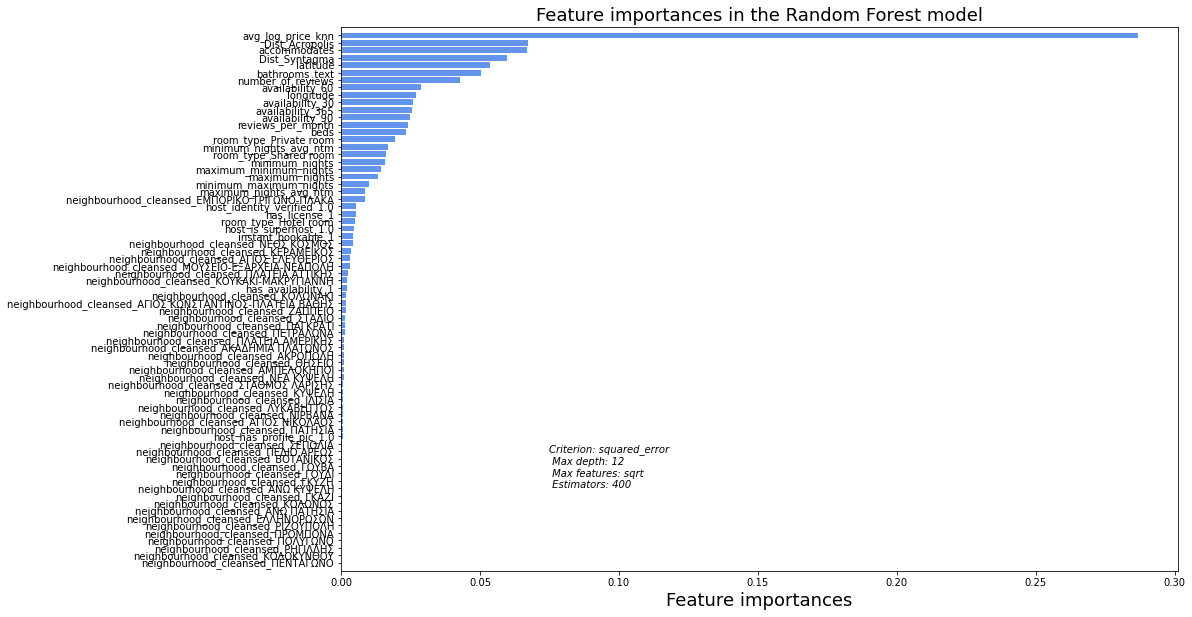

In [ ]:
rf_reg = pd.DataFrame(
    rfc_best.feature_importances_, columns=["weight"], index=x_train.columns
)
rf_reg.sort_values("weight", inplace=True)

plt.figure(figsize=(15, 10))

plt.barh(rf_reg.index, rf_reg.weight, align="center", color="cornflowerblue")
plt.title("Feature importances in the Random Forest model", fontsize=18, color="black")
plt.xlabel("Feature importances", fontsize=18, color="black")
plt.ylabel("", fontsize=20, color="black")

data_string = f'Criterion: {rfc_best_params["criterion"]}\n Max depth: {rfc_best_params["max_depth"]} \n Max features: {rfc_best_params["max_features"]}\n Estimators: {rfc_best_params["n_estimators"]}'
# data_string = f'Criterion: squared_error \n Max depth: 2 \n Estimators: 300 '
plt.text(0.075, 10, data_string, style="italic")

plt.margins(y=0.01)
plt.show()

In [ ]:
import pickle

path = "/content/drive/My Drive/"
with open(path + "rf_model_message_passing", "wb") as f:
    pickle.dump(rfc_best, f)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## XGBoost model

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
params = {
    "max_depth": [3, 6, 10],
    "subsample": [0.7],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 500, 1000],
    "colsample_bytree": [0.3, 0.7],
    "random_state": [seed],
}

In [ ]:
xgbr = xgb.XGBRegressor()
clf = GridSearchCV(
    estimator=xgbr,
    param_grid=params,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=2,
)

In [ ]:
clf_xgb = clf.fit(x_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[12:55:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42, subsample=0.7; total time=   0.8s
[12:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42, subsample=0.7; total time=   0.8s
[12:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42, subsample=0.7; total time=   0.7s
[12:55:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, 

In [ ]:
c = {
    "colsample_bytree": 0.7,
    "learning_rate": 0.01,
    "max_depth": 10,
    "n_estimators": 1000,
    "random_state": 42,
    "subsample": 0.7,
}
c

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 1000,
 'random_state': 42,
 'subsample': 0.7}

In [ ]:
x_train

,latitude,longitude,accommodates,bathrooms_text,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,reviews_per_month,Dist_Acropolis,Dist_Syntagma,neighbourhood_cleansed_ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,neighbourhood_cleansed_ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,neighbourhood_cleansed_ΑΚΡΟΠΟΛΗ,neighbourhood_cleansed_ΑΜΠΕΛΟΚΗΠΟΙ,neighbourhood_cleansed_ΑΝΩ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΑΝΩ ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΒΟΤΑΝΙΚΟΣ,neighbourhood_cleansed_ΓΚΑΖΙ,neighbourhood_cleansed_ΓΚΥΖΗ,neighbourhood_cleansed_ΓΟΥΒΑ,neighbourhood_cleansed_ΓΟΥΔΙ,neighbourhood_cleansed_ΕΛΛΗΝΟΡΩΣΩΝ,neighbourhood_cleansed_ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,neighbourhood_cleansed_ΖΑΠΠΕΙΟ,neighbourhood_cleansed_ΘΗΣΕΙΟ,neighbourhood_cleansed_ΙΛΙΣΙΑ,neighbourhood_cleansed_ΚΕΡΑΜΕΙΚΟΣ,neighbourhood_cleansed_ΚΟΛΟΚΥΝΘΟΥ,neighbourhood_cleansed_ΚΟΛΩΝΑΚΙ,neighbourhood_cleansed_ΚΟΛΩΝΟΣ,neighbourhood_cleansed_ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,neighbourhood_cleansed_ΚΥΨΕΛΗ,neighbourhood_cleansed_ΛΥΚΑΒΗΤΤΟΣ,neighbourhood_cleansed_ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,neighbourhood_cleansed_ΝΕΑ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΝΕΟΣ ΚΟΣΜΟΣ,neighbourhood_cleansed_ΝΙΡΒΑΝΑ,neighbourhood_cleansed_ΠΑΓΚΡΑΤΙ,neighbourhood_cleansed_ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΠΕΔΙΟ ΑΡΕΩΣ,neighbourhood_cleansed_ΠΕΝΤΑΓΩΝΟ,neighbourhood_cleansed_ΠΕΤΡΑΛΩΝΑ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,neighbourhood_cleansed_ΠΟΛΥΓΩΝΟ,neighbourhood_cleansed_ΠΡΟΜΠΟΝΑ,neighbourhood_cleansed_ΡΗΓΙΛΛΗΣ,neighbourhood_cleansed_ΡΙΖΟΥΠΟΛΗ,neighbourhood_cleansed_ΣΕΠΟΛΙΑ,neighbourhood_cleansed_ΣΤΑΔΙΟ,neighbourhood_cleansed_ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1.0,host_has_profile_pic_1.0,host_identity_verified_1.0,has_availability_1,instant_bookable_1,has_license_1,avg_log_price_knn
0,37.98774,23.72788,5,1.0,4.0,2,31,2,31,2.0,31.0,29,59,89,179,0,1.20,1.697690,1.466880,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.843056
1,37.99185,23.74902,6,1.0,2.0,1,29,1,1125,1.0,1125.0,0,0,0,62,75,1.26,2.953900,2.177478,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,3.697204
2,37.98972,23.73995,3,1.0,1.0,1,1125,1,1125,1.0,1125.0,29,59,89,90,36,0.57,2.273573,1.615544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,7.440399
3,37.99412,23.74306,1,1.0,2.0,7,21,7,21,7.0,21.0,24,54,84,174,0,1.20,2.832628,2.164705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,3.423200
4,38.00087,23.73224,3,1.0,2.0,1,120,1,120,1.0,120.0,0,0,0,3,9,0.56,3.197735,2.802305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,3.332227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,37.98576,23.73371,2,1.0,1.0,2,1125,2,1125,2.0,1125.0,2,14,40,200,55,2.14,1.621695,1.117288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,3.423199
7181,37.99770,23.72758,3,1.0,1.0,2,1125,2,1125,2.0,1125.0,0,0,2,66,40,1.39,2.799964,2.522569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,3.308129
7182,37.97077,23.74776,2,1.0,3.0,1,1125,1,1125,1.0,1125.0,30,60,90,180,0,1.20,1.930577,1.258446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,3.784215
7183,37.99504,23.72718,6,1.5,3.0,2,365,2,365,2.0,365.0,4,28,58,333,136,2.1

In [ ]:
clf_xgb = XGBRegressor(
    max_depth=c["max_depth"],
    subsample=c["subsample"],
    learning_rate=c["learning_rate"],
    n_estimators=c["n_estimators"],
    colsample_bytree=c["colsample_bytree"],
    random_state=c["random_state"],
).fit(x_train, y_train)

[13:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Use the model to predict values
# Predict the model
y_pred_xgb = clf_xgb.predict(x_test)

# Calculate the Mean absolute Error using the mean_absolute_error function.
print("Test Data")
print(
    "Mean Absolute Error : %0.3f"
    % mean_absolute_error(y_test.pow(2.7183), np.power(y_pred_xgb, 2.7183))
)
print(
    "Mean Absolute Percentage Error : %0.3f"
    % mean_absolute_percentage_error(y_test.pow(2.7183), np.power(y_pred_xgb, 2.7183))
)

Test Data
Mean Absolute Error : 10.467
Mean Absolute Percentage Error : 0.236


In [ ]:
print(xgb.__version__)

In [ ]:
rf_reg = pd.DataFrame(
    clf_xgb.feature_importances_, columns=["weight"], index=x_train.columns
)
rf_reg.sort_values("weight", inplace=True)
plt.figure(figsize=(16, 14))
plt.barh(rf_reg.index, rf_reg.weight, align="center", color="cornflowerblue")
plt.title(
    "Feature importances in the XGBoost regressor model", fontsize=18, color="black"
)
plt.xlabel("Feature importances", fontsize=18, color="black")
plt.ylabel("", fontsize=18, color="black")
plt.margins(y=0.01)
plt.show()

In [ ]:
path = "/content/drive/My Drive/"
clf_xgb.save_model(path + "xgb_model_message_passing")

## MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

In [ ]:
grid = {
    "hidden_layer_sizes": [(128, 128), (128, 256, 256), (256, 256)],
    "solver": ["adam"],
    "learning_rate_init": [0.001, 0.0001],
    "activation": ["relu"],
    "alpha": [0.0001, 0.001, 0.005],
    "early_stopping": [True, False],
    "max_iter": [300],
    "random_state": [seed],
}

In [ ]:
mlp = GridSearchCV(
    estimator=MLPRegressor(), param_grid=grid, cv=4, n_jobs=-1, verbose=2
)
mlp.fit(x_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=4, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': [0.0001, 0.001, 0.005],
                         'early_stopping': [True, False],
                         'hidden_layer_sizes': [(128, 128), (128, 256, 256),
                                                (256, 256)],
                         'learning_rate_init': [0.001, 0.0001],
                         'max_iter': [300], 'random_state': [42],
                         'solver': ['adam']},
             verbose=2)

In [ ]:
mlp_best_params = mlp.best_params_
mlp_best_params

{'activation': 'relu',
 'alpha': 0.005,
 'early_stopping': True,
 'hidden_layer_sizes': (128, 128),
 'learning_rate_init': 0.001,
 'max_iter': 300,
 'random_state': 42,
 'solver': 'adam'}

In [ ]:
best_mlp = MLPRegressor(
    hidden_layer_sizes=mlp_best_params["hidden_layer_sizes"],
    solver=mlp_best_params["solver"],
    learning_rate_init=mlp_best_params["learning_rate_init"],
    activation=mlp_best_params["activation"],
    alpha=mlp_best_params["alpha"],
    early_stopping=mlp_best_params["early_stopping"],
    max_iter=mlp_best_params["max_iter"],
    random_state=mlp_best_params["random_state"],
).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred_mlp = best_mlp.predict(x_test)
# Calculate the Mean absolute Error using the mean_absolute_error function.
print("Test Data")
print(
    "Mean Absolute Error : %0.3f"
    % mean_absolute_error(y_test.pow(2.7183), np.power(pred_mlp, 2.7183))
)
print(
    "Mean Absolute Percentage Error : %0.3f"
    % mean_absolute_percentage_error(y_test.pow(2.7183), np.power(pred_mlp, 2.7183))
)

Test Data
Mean Absolute Error : 12.415
Mean Absolute Percentage Error : 0.291
